# Political Science 3 Lecture I: Hypothesis Testing
Professor: Jason Wittenberg  
Author: Eric Van Dusen, William McEachen

## Agenda
1) 2 categorical variables  
2) 1 categorical, 1 continuous variable  
3) 2 continuous variables

In [1]:
import numpy as np
from scipy import stats
from datascience import Table
import pandas as pd
from ipywidgets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Tabular Analysis  
In the following example, we will explore how to determine if there is a relationship between two categorical variables. Given a table of how many people voted for the 2012 presidential candidate, can we establish a connection between gender and political affiliation?

Suppose we know that 49.2% of the sample voted for Obama and 50.8% voted for Romney, regardless of gender. The table represents the values we should expect given the total number of people. 

In [2]:
expected_table = Table().with_columns(
                'Politican',['Obama', 'Romney', 'Column Total'],
                'Male', ['0.492*374=184', '0.507*374=190', 374],
                'Female', ['0.492*437=215', '0.508*437=222', 437],
                'Row Total', [399, 412, 811]
                )
expected_table

Politican,Male,Female,Row Total
Obama,0.492*374=184,0.492*437=215,399
Romney,0.507*374=190,0.508*437=222,412
Column Total,374,437,811


If there is no relationship between gender and voting decisions, the number of voters in each cell should be proportional to the overall frequency of that politician and the overall number of people of that gender. Because we know the total number of men and women that voted, we set the expected value for each gender/politician cell to that politician's frequency (49.2% or 50.8%) multiplied by the total number of the gender (374 or 437).

Now that we have the expected values, let's check the real results:

In [3]:
respond_table = Table().with_columns(
                'Politican',['Obama', 'Romney', 'Column Total'],
                'Male', [170, 204, 374],
                'Female', [229, 208, 437],
                'Row Total', ['49%', '51%', '100%']
                )
respond_table

Politican,Male,Female,Row Total
Obama,170,229,49%
Romney,204,208,51%
Column Total,374,437,100%


How does this compare to the expected results?

In [4]:
compare_table = Table().with_columns(
                'Politican',['Obama', 'Romney'],
                'Male', ['Expected: 184 Actual: 170', 'Expected: 190 Actual: 204'],
                'Female', ['Expected: 215 Actual: 229', 'Expected: 222 Actual: 208']
                )
compare_table

Politican,Male,Female
Obama,Expected: 184 Actual: 170,Expected: 215 Actual: 229
Romney,Expected: 190 Actual: 204,Expected: 222 Actual: 208


*Review*: What differences do you see between the expected and reported values?  


Given the expected and actual results, we can compute the *chi square* statistic for this table. The chi square statistic is the measure used for the significance of categorical varibales (in this case voting record and gender). It is calculated by taking the the sum difference between the observed values and the expected values squared, divided by the expected value.
$$ \chi^2 = \sum \frac{(O-E)^2}{E}$$.

For the election and gender case, this reduces to the following:
$$\frac{(170-184)^2}{184}+\frac{(229-215)^2}{215}+\frac{(204-190)^2}{190}+\frac{(208-222)^2}{222}=3.892$$

Using a textbook appendix (or online tables), we can determine that the difference achieves a p-value under .05, making the relationship between gender and voting behavior statistically significant for this sample.

#### Using Python
To automatically run a chi-squared test in python, create lists of the expected values and of the observed values, and run the following:  
<code> stats.chisquare(observed_array, f_exp=epected_array)  </code>

This will return the $\chi^2$ statistic and the associated p-value. Below, we perform the calculation for the gender/vote relationship.

NOTE: This command returns a Power_divergenceResult. This holds the statistic and p-value for the data.

In [6]:
#NOTE: The expected_table above uses strings, but we need numbers for the computation to be successful. 
#The new expected_table is the original expected_table's numeric values.

expected_table = Table().with_columns(
                'Politican',['Obama', 'Romney', 'Column Total'],
                'Male', [184, 190, 374],
                'Female', [215, 222, 437],
                'Row Total', [399, 412, 811]
                )
expected = np.append(expected_table.column('Male')[:2], expected_table.column('Female')[:2])
reported = np.append(respond_table.column('Male')[:2], respond_table.column('Female')[:2])
stats.chisquare(reported, f_exp=expected, ddof=1)

Power_divergenceResult(statistic=3.891307128532396, pvalue=0.14289380252997252)

As we can see, we achieve a p-value of .0485, just below the .05 threshold. Therefore, the relationship is statistically significant.

## Difference of Means: Comparing Samples

When we have a continuous variable categorized by a categorical variable, we can use a *difference of means* test to determine if there is a relationship between the categorical variable and the continuous variable. For example, we would use a difference of means test to determine if there was a relationship between ice cream flavor (a categorical variable) and sales revenue (a continuous variable). In the example below, we will determine if there is a relationship between party control majority and their governing time. In parliamentary systems, the party in control often is not the majority, just a plurality. When this happens, when the governing party is the minority, does it have shorter governing times? Let's find out!

Below, we load in a table called <code>govts_df</code> that has 4 columns: <code>nation</code>, <code>govttime</code>, the amount of time the government is in control, and <code>mingov</code>, a binary categorical variable where 1 signifies that the party was the minority. Let's load the table first:

In [2]:
govts_df = pd.read_csv('data/govts.csv').drop('govtdate', axis=1)
govts_df

,nation,govttime,mingov
0,Italy,31.0,1.0
1,Denmark,42.0,1.0
2,Belgium,48.0,1.0
3,Belgium,49.0,0.0
4,Iceland,117.0,0.0
...,...,...,...
172,Netherlands,1555.0,0.0
173,Belgium,1555.0,0.0
174,Ireland,1574.0,0.0
175,Netherlands,1683.0,0.0


Now, let's plot the distributions of <code>govttime</code>, separated by <code>mingov</code>.

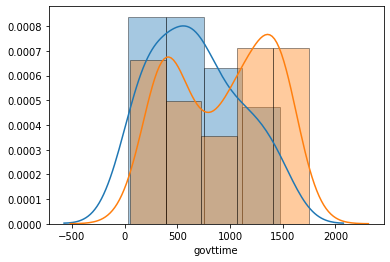

In [7]:
sns.distplot(govts_df[govts_df.mingov==1]['govttime'], label='minority')
sns.distplot(govts_df[govts_df.mingov==0]['govttime'], label='majority')

What do you notice about the two distributions?

To manually calculate the p-value for a statistically significant difference between the two distributions, we use the following formula, where $\overline{Y_i}$ represents the mean for group i, $\sigma_i$ is the standard deviation for group i, and $n_i$ is the number of rows/samples for group i:   
$$\frac{\overline{Y_1}-\overline{Y_2}}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$

Once we have calculated this statistic, we can use an online table or a textbook's appendix to determine if it meets the appropriate threshold for a p-value below .05.

#### Using Python
In order to compare the distributions of values by a categorical variable, create an array for the continuous variable for each of the values of the categorical variable. Because <code>mingov</code> has 2 values, we will create 2 arrays. We then use <code>stats.ttest_ind(categorical_value_1_array, categorical_value_2_array)</code>  

In [8]:
minority_arr = govts_df[govts_df.mingov==1]['govttime']
majority_arr = govts_df[govts_df.mingov==0]['govttime']
stats.ttest_ind(minority_arr,majority_arr)

Ttest_indResult(statistic=-3.4432201167704233, pvalue=0.0007192307610674558)

Above, we determined that the statistic's value was -3.44, which has a corresponding p-value of .0007, which is far under the threshold of .05. Therefore, the relationship is statistically significant.

### Interactive Visual
Below, we visualize the sampling distribution for some random variable (the null distribution) and the mean for an alternative distribution (generated similarly to the null hypothesis, but with an offset). How does changing the difference in means between the null and alternative distributions change the p-value?

In [9]:
def p_value_interactive(center, alt_offset):
    #Base Case/Null Array
    null_arr = np.random.randint(center/2, (center/2)+center, size=300)
    #Sampling distribution of above
    sampling_dist = [np.mean(np.random.randint(center/2, (center/2)+center, size=300)) for _ in range(10000)]
    #Alternative Array
    alt_arr = np.random.randint((center/2)+alt_offset, center+(center/2)+alt_offset, size=300)
    #Calculate p-value
    print(stats.ttest_ind(null_arr, alt_arr))
    #Plot distribution of sample means for null hypothesis
    sns.distplot(sampling_dist, label='sampling distribution', hist=False)
    plt.axvline(np.mean(alt_arr))
    plt.xlim(89,111)
    plt.legend()
    
interact(p_value_interactive, center=(50,150), alt_offset=(-10,10), continuous_update=False)

interactive(children=(IntSlider(value=100, description='center', max=150, min=50), IntSlider(value=0, descript…

<function __main__.p_value_interactive(center, alt_offset)>

## Covariance and Pearson's r: Continuous Variables
When both variables are continuous, we want to measure their *covariance*: the degree to which one of the variable's change in value coincides with a similar change in value in the other variable. In the following example, we shall explore the covariance of GDP and incumbent vote share.

First, we need to load in the data set from a CSV. This table has many different columns, but we are concerned with the "VOTE" and "GROWTH" columns. The "VOTE" column represents the percentage of the vote the incumbent received, and "GROWTH" represents the percent change in GDP that year.

In [3]:
fair_df = pd.read_csv('data/fair.csv')
fair_df

,YEAR,VOTE,PARTY,PERSON,DURATION,WAR,GROWTH,INFLATION,GOODNEWS
0,1880,50.220,-1,0,1.75,0,3.879,1.974,9
1,1884,49.846,-1,0,2.00,0,1.589,1.055,2
2,1888,50.414,1,1,0.00,0,-5.553,0.604,3
3,1892,48.268,-1,1,0.00,0,2.763,2.274,7
4,1896,47.760,1,0,0.00,0,-10.024,3.410,6
5,1900,53.171,-1,1,0.00,0,-1.425,2.548,7
6,1904,60.006,-1,0,1.00,0,-2.421,1.442,5
7,1908,54.483,-1,0,1.25,0,-6.281,1.879,8
8,1912,54.708,-1,1,1.50,0,4.164,2.172,8
9,1916,51.682,1,1,0.00,0,2.229,4.252,3


Because our independent variable is GDP growth, we plot it on the x-axis.   
What relationship between the two variables do you observe?

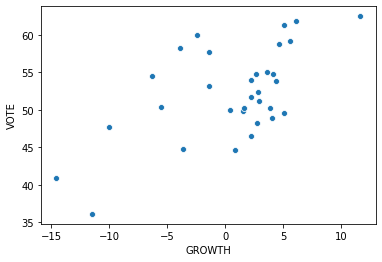

In [11]:
sns.scatterplot('GROWTH', 'VOTE', data=fair_df)

To calculate the covariance of these two variables, we use the following formula:
$$cov_{XY}=\frac{\sum_{i=1}^n (X_i - \overline{X})(Y_i - \overline{Y})}{n}$$
For this example, this is the following:
$$cov_{GDP,Vote-Share}=\frac{\sum_{i=1}^n (GROWTH_i - \overline{GROWTH})(Vote-Share_i - \overline{Vote-Share})}{32}$$
*Review*: As the values of X and Y increase or decrease relative to their means, what happens to the covariance?

#### Using Python
To calculate the covariance in Python, use <code>np.cov(X, Y)</code>. This returns a list of cov(X,X), cov(X,Y), cov(Y,X), cov(Y,Y). Because we care about the covariance between X and Y, let's use the second result. We calculate the covariance between GDP growth and incumbent vote share below:

In [12]:
np.cov(fair_df.GROWTH, fair_df.VOTE)[0][1] #The [0][1] indexes to cov(X,Y)

20.052385838709675

Now that we have the covariance, we can calculate the correlation coefficient, *Pearson's r*: a value between -1 and 1 that represents the correlation between two variables. It is calculated thus:
$$r=\frac{cov_{XY}}{\sqrt{var_Xvar_Y}}=\frac{cov_{XY}}{\sqrt{cov_{XX}cov_{YY}}}$$
Given how the correlation coefficient is calculated, what must be the case when it is positive? What about it when it is close to 0?

#### Using Python
To caculate the correlation coefficient in Python, we use <code>stats.pearsonr(X,Y)</code>. This returns the r value, and the p-value representing the likelihood that the coinciding r value could have occurred by random. Below, we calculate the correlation coefficient for GDP and incumbent vote share:

In [13]:
stats.pearsonr(fair_df.GROWTH, fair_df.VOTE)

(0.5962706038173969, 0.00031645087038378904)

Given the above Pearson's r, what can we conclude about the relationsip between GDP growth and incumbent vote share?

### Interactive Visual
Below, we visualize two distributions and calculate the difference of means statistic and p-value for the likelihood that the two distributions are truly different.

In [14]:
def cloud(covariance):
    X,Y = list(zip(*np.random.multivariate_normal([5,5], [[1,covariance],[covariance,1]], size=1000).tolist()))
    sns.scatterplot(X, Y)
    print("R-value:",stats.pearsonr(X,Y)[0])

interact(cloud, covariance=(-1.0,1.0), continuous_update=False)

interactive(children=(FloatSlider(value=0.0, description='covariance', max=1.0, min=-1.0), Output()), _dom_cla…

<function __main__.cloud(covariance)>